# Problem Set 2 - Yutao Chen

In [1]:
## Library Packages loading
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import math
import sympy as sy

## 1. Health claim amounts and the GB family of distributions
### 1. (a) 

In [2]:
# (a) Calculate and report the mean, median, maximum, minimum, and standard deviation of monthly health expenditures for these data.
health_df = pd.read_csv("clms.txt", header=None)
health_df

,0
0,361.65
1,123.04
2,541.77
3,862.90
4,55.60
5,3728.56
6,70.00
7,730.63
8,420.56
9,81.63


In [3]:
print("maximum value:", max(health_df[0]))
print("minimum value:", min(health_df[0]))
print("mean value:", np.mean(health_df[0]))
print("median value:", np.median(health_df[0]))
print("standard deviation:", np.std(health_df[0]))
print("variance:", np.var(health_df[0]))

maximum value: 227967.25
minimum value: 0.01
mean value: 720.2779753272415
median value: 172.21
standard deviation: 3972.663756393654
variance: 15782057.321363734


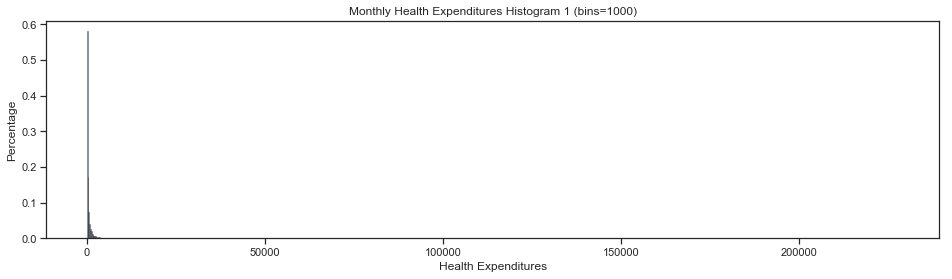

In [4]:
# (a) Plot two histograms of the data in which the y-axis gives the percent of observations in the particular bin of health expenditures 
#     and the x-axis gives the value of monthly health expenditures. 

# In the first percentage histogram, use 1,000 bins to plot the frequency of all the data.
sns.set(rc={'figure.figsize':(16,4)})
sns.set_style("ticks")
h1_ax = sns.distplot(health_df[0], bins=1000, kde=False, hist_kws = {'edgecolor': 'k', 'weights':[1/len(health_df[0])]*len(health_df[0])})
h1_ax.set_title("Monthly Health Expenditures Histogram 1 (bins=1000)")
h1_ax.set_xlabel("Health Expenditures")
h1_ax.set_ylabel("Percentage")
plt.show()

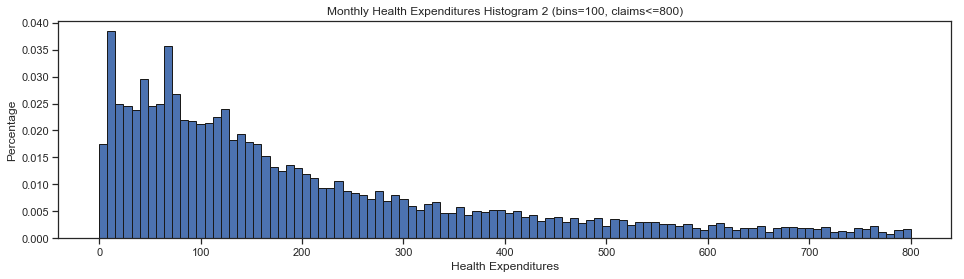

In [5]:
# In the second percentage histogram, use 100 bins to plot the frequency of only monthly health expenditures less-than-or-equal-to $800 (xi ≤ 800). 
# Adjust the frequencies of this second histogram to account for the observations that you have not displayed (xi > 800).

count, bins, ignored = plt.hist(health_df[0], bins=100, range=(min(health_df[0]),800), 
                                weights=[1/len(health_df[0])]*len(health_df[0]), edgecolor='k')

plt.title('Monthly Health Expenditures Histogram 2 (bins=100, claims<=800)')
plt.xlabel('Health Expenditures')
plt.ylabel('Percentage')
plt.show()

In [6]:
# The percentages have been adjusted, so the heights of the histogram bars in the second histogram do not sum to 1  
sum(count)

0.8494208494208462

The second one is better because it captures the main part of the data, and is more visually friendly. Though the first histogram capture the whole span of the data, but we can not clearly see the distribution of the core part, especially how high density data fluctuate. I think this would bring obstacles for comparing different estimations of the data's distribution.  

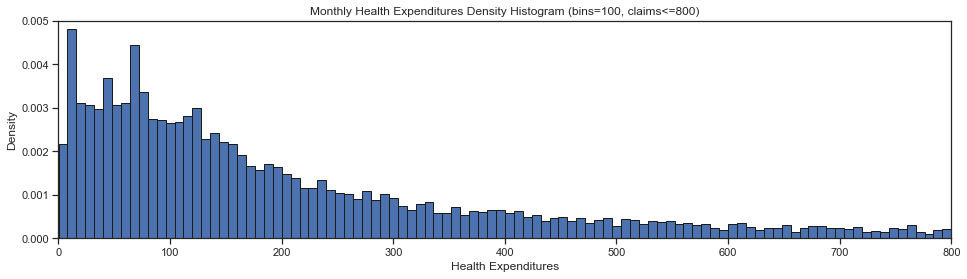

In [48]:
# The density histogram
bin_edges = list(np.linspace(min(health_df[0]),800,101)) + [max(health_df[0])]
density_count, density_bins, density_ignored = plt.hist(health_df[0], bins=bin_edges, density=True, edgecolor='k')
plt.title('Monthly Health Expenditures Density Histogram (bins=100, claims<=800)')
plt.xlabel('Health Expenditures')
plt.ylabel('Density')
plt.ylim([0,0.005])
plt.xlim([0,800])
plt.show()

### 1. (b)

In [7]:
# (b) Using MLE, fit the gamma GA(x; α, β) distribution to the individual observation data. Use β0 = V ar(x)/E(x) and α0 = E(x)/β0 as your initial guess.1 Report your estimated values for ˆα and βˆ, as well as
# the value of the maximized log likelihood function ln L(ˆθ). Plot the second histogram from part (a) overlayed with a line representing the implied
# histogram from your estimated gamma (GA) distribution.

# Define the function that generates negative log-likelihood value.
def NLL(paras, dist, xvals):
    '''
    --------------------------------------------------------------------
    Calculate the negative log-likelihood value from the data with 
    the assumed distribution
    --------------------------------------------------------------------
    INPUTS:
    paras = (N,) vector, values of parameters 
    xvals = (N,) vector, values of the random variable
    dist  = function (callable), name for the distribution 
            (should have the member logpdf(x, ...))   
    
    RETURNS: negative log-likelihood value
    --------------------------------------------------------------------
    '''
    return sum(dist.logpdf(xvals, *paras))*(-1) 

# calculate the GA MLE
beta_init = np.var(health_df[0])/np.mean(health_df[0])
alpha_init = np.mean(health_df[0])/beta_init
GA_result = sp.optimize.minimize(NLL, np.array((alpha_init, 0, beta_init)), args = (sp.stats.gamma, health_df[0].values), 
                                 tol=1e-12, method="SLSQP", options={'maxiter': 1000}, bounds=[(1e-10,None),(0,0),(1e-10,None)])
print(GA_result) 

     fun: 77723.72556715
     jac: array([ 8.00781250e-02, -3.06297852e+02,  7.22656250e-02])
 message: 'Optimization terminated successfully.'
    nfev: 496
     nit: 84
    njev: 82
  status: 0
 success: True
       x: array([4.70158613e-01, 0.00000000e+00, 1.54408749e+03])


In [8]:
print("estimated alpha:",GA_result.x[0])
print("estimated beta:", GA_result.x[2])
print("maximum log likelihood:",(-1)*GA_result.fun)

estimated alpha: 0.4701586129287519
estimated beta: 1544.0874860874424
maximum log likelihood: -77723.72556715


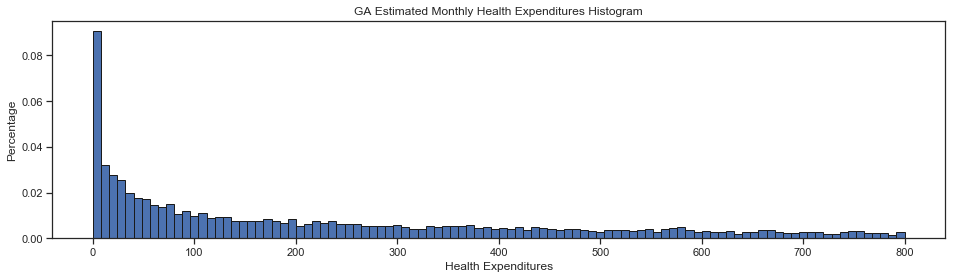

In [9]:
# plot the GA MLE histogram
gamma = sp.stats.gamma.rvs(GA_result.x[0],0,GA_result.x[2],size=len(health_df[0]))
gamma_count, gamma_bins, gamma_ignored = plt.hist(gamma, bins=100, range=(min(health_df[0]),800), 
                                                  weights=[1/len(health_df[0])]*len(health_df[0]), edgecolor='k')
plt.title('GA Estimated Monthly Health Expenditures Histogram')
plt.xlabel('Health Expenditures')
plt.ylabel('Percentage')
plt.show()

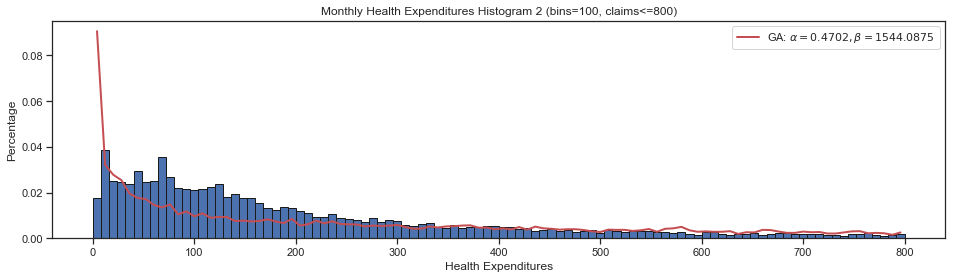

In [10]:
# plot the GA MLE histogram curve (not PDF) on the original second histogram
count, bins, ignored = plt.hist(health_df[0], bins=100, range=(min(health_df[0]),800), 
                                weights=[1/len(health_df[0])]*len(health_df[0]), edgecolor='k')
plt.plot([0.5*(gamma_bins[i]+gamma_bins[i+1]) for i in range(100)], gamma_count,
        linewidth=2, color='r', label=r'GA: $\alpha={}, \beta={}$'.format(round(GA_result.x[0],4),round(GA_result.x[2],4)))

plt.title('Monthly Health Expenditures Histogram 2 (bins=100, claims<=800)')
plt.xlabel('Health Expenditures')
plt.ylabel('Percentage')
plt.legend()
plt.show()

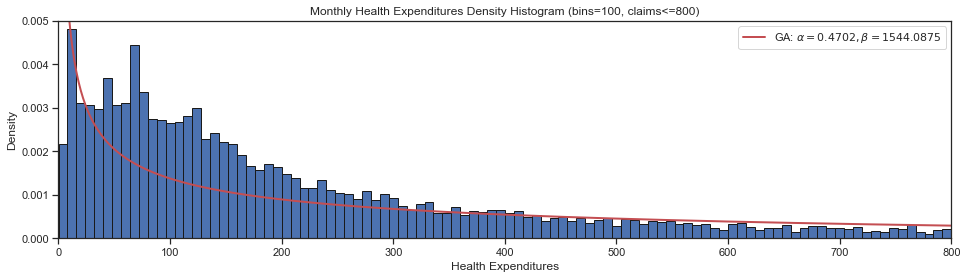

In [45]:
# plot the original density and the GA density
bin_edges = list(np.linspace(min(health_df[0]),800,101)) + [max(health_df[0])]
density_count, density_bins, density_ignored = plt.hist(health_df[0], bins=bin_edges, density=True, edgecolor='k')
plt.plot(range(0,801), sp.stats.gamma.pdf(range(0,801), GA_result.x[0],0,GA_result.x[2]),
         linewidth=2, color='r', label=r'GA: $\alpha={}, \beta={}$'.format(round(GA_result.x[0],4),round(GA_result.x[2],4)))

plt.title('Monthly Health Expenditures Density Histogram (bins=100, claims<=800)')
plt.xlabel('Health Expenditures')
plt.ylabel('Density')
plt.ylim([0,0.005])
plt.xlim([0,800])
plt.legend()
plt.show()

### 1. (c)

In [12]:
# (c) Using MLE, fit the generalized gamma GG(x; α, β, m) distribution to the individual observation data. Use your estimates for α and β from part(b),
# as well as m = 1, as your initial guess. Report your estimated values for ˆα, βˆ, and ˆm, as well as the value of the maximized log likelihood 
# function lnL. Plot the second histogram from part (a) overlayed with a line representing the implied histogram from your estimated generalized gamma 
# (GG) distribution.

def GG_pdf(x,a,b,m):
    return (m*(x**(a-1))*np.exp(-(x/b)**m))/((b**a)*sp.special.gamma(a/m))

def GG_cdf(a,b,m, up=np.inf, bottom=0):
    return sp.integrate.quad(lambda x:GG_pdf(x,a,b,m), bottom,up)[0]

def GG_NLL(paras, xvals):
    a,b,m = paras
    log_likelihood = np.log(m)+(a-1)*np.log(xvals)-(xvals/b)**m-a*np.log(b)-np.log(sp.special.gamma(a/m))
    return sum(log_likelihood)*(-1)                                                                                 

In [13]:
# calculate the GG MLE
m_init = 1.0
GG_result = sp.optimize.minimize(GG_NLL, np.array((GA_result.x[0], GA_result.x[2], m_init)), args = (health_df[0].values), 
                                 bounds=[(1e-10,None),(1e-10,None),(1e-10,None)], method="SLSQP", options ={"maxiter":1000})
print(GG_result) 

     fun: 74981.85260060977
     jac: array([-2.75809570e+02, -5.12811281e+07,  1.74871523e+04])
 message: 'Optimization terminated successfully.'
    nfev: 1313
     nit: 228
    njev: 228
  status: 0
 success: True
       x: array([2.79666485e+00, 1.57773444e-06, 1.54541887e-01])


In [14]:
print("estimated alpha:",GG_result.x[0])
print("estimated beta:",GG_result.x[1])
print("estimated m:",GG_result.x[2])
print("maximum log likelihood:",(-1)*GG_result.fun)

estimated alpha: 2.7966648457632126
estimated beta: 1.5777344447273971e-06
estimated m: 0.15454188681354086
maximum log likelihood: -74981.85260060977


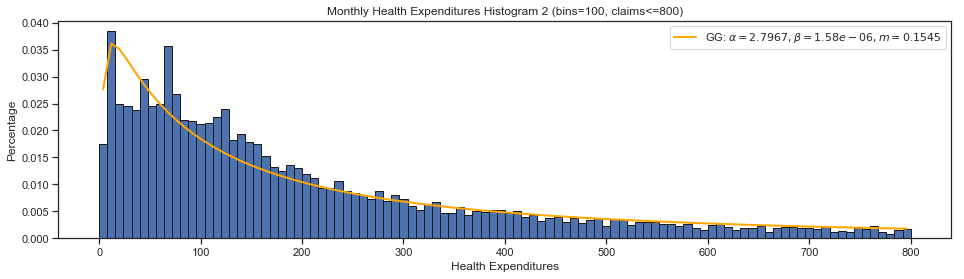

In [15]:
# plot the GG MLE histogram curve (not PDF) on the original second histogram
count, bins, ignored = plt.hist(health_df[0], bins=100, range=(min(health_df[0]),800), 
                                weights=[1/len(health_df[0])]*len(health_df[0]), edgecolor='k')
plt.plot([0.5*(bins[i]+bins[i+1]) for i in range(100)], 
         [GG_cdf(a=GG_result.x[0], b=GG_result.x[1], m=GG_result.x[2], up=gamma_bins[i], bottom=gamma_bins[i-1]) for i in range(1,101)], 
         linewidth=2,color = 'orange', 
         label=r'GG: $\alpha={}, \beta={}, m={}$'.format(round(GG_result.x[0],4),round(GG_result.x[1],8),round(GG_result.x[2],4)))

plt.title('Monthly Health Expenditures Histogram 2 (bins=100, claims<=800)')
plt.xlabel('Health Expenditures')
plt.ylabel('Percentage')
plt.legend()
plt.show()

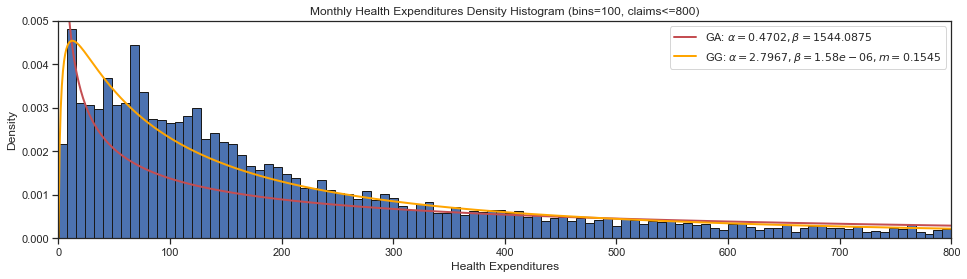

In [44]:
# plot the original density and the GA, GG density
bin_edges = list(np.linspace(min(health_df[0]),800,101)) + [max(health_df[0])]
density_count, density_bins, density_ignored = plt.hist(health_df[0], bins=bin_edges, density=True, edgecolor='k')
plt.plot(range(0,801), sp.stats.gamma.pdf(range(0,801), GA_result.x[0],0,GA_result.x[2]),
         linewidth=2, color='r', label=r'GA: $\alpha={}, \beta={}$'.format(round(GA_result.x[0],4),round(GA_result.x[2],4)))
plt.plot(range(0,801), GG_pdf(range(0,801), a=GG_result.x[0], b=GG_result.x[1], m=GG_result.x[2]),
         linewidth=2, color='orange',
         label=r'GG: $\alpha={}, \beta={}, m={}$'.format(round(GG_result.x[0],4),round(GG_result.x[1],8),round(GG_result.x[2],4)))

plt.title('Monthly Health Expenditures Density Histogram (bins=100, claims<=800)')
plt.xlabel('Health Expenditures')
plt.ylabel('Density')
plt.ylim([0,0.005])
plt.xlim([0,800])
plt.legend()
plt.show()

### 1. (d)

In [17]:
# (d) Using MLE, fit the generalized beta 2 GB2(x; a, b, p, q) distribution to the individual observation data. Use your estimates for α, β, and m 
# from part (c), as well as q = 10, 000, as your initial guess. Report your estimated values for ˆa, ˆb, ˆp, and ˆq, as well as the value of the 
# maximized log likelihood function lnL. Plot the second histogram from part(a) overlayed with a line representing the implied histogram from your 
# estimated generalized beta 2 (GB2) distribution.

def GB2_pdf(x,a,b,p,q):
    return (a*x**(a*p-1))/((b**(a*p))*sp.special.beta(p,q)*(1+(x/b)**a)**(p+q))

def GB2_cdf(a,b,p,q, up=np.inf, bottom=0):
    return sp.integrate.quad(lambda x:GB2_pdf(x,a,b,p,q), bottom,up)[0]

def GB2_NLL(paras, xvals):
    a,b,p,q = paras
    log_likelihood = np.log(a) + (a*p-1)*np.log(xvals)-a*p*np.log(b)-np.log(sp.special.beta(p,q))-(p+q)*np.log(1+(xvals/b)**a)
    return sum(log_likelihood)*(-1)                               

In [23]:
# calculate the GB2 MLE

q_init = 10000
a_init = GG_result.x[2]
b_init = GG_result.x[1]*(q_init**(1/GG_result.x[2]))
p_init = GG_result.x[0]/GG_result.x[2]
GB2_result = sp.optimize.minimize(GB2_NLL, np.array((a_init,b_init,p_init,q_init)), args = (health_df[0].values), method="SLSQP",
                                 bounds=[(1e-10,None),(1e-10,None),(1e-10,None),(1e-10,None)], options ={"maxiter":1000})
print(GB2_result) 

     fun: 74978.00334950184
     jac: array([-28.44042969,   0.        ,   5.44238281,   9.41894531])
 message: 'Optimization terminated successfully.'
    nfev: 181
     nit: 19
    njev: 19
  status: 0
 success: True
       x: array([1.53899051e-01, 1.20499256e+20, 1.86352031e+01, 9.99996948e+03])


In [24]:
print("estimated a:",GB2_result.x[0])
print("estimated b:",GB2_result.x[1])
print("estimated p:",GB2_result.x[2])
print("estimated q:",GB2_result.x[3])
print("maximum log likelihood:",(-1)*GB2_result.fun)

estimated a: 0.15389905104683008
estimated b: 1.204992557446691e+20
estimated p: 18.63520307317655
estimated q: 9999.969481984279
maximum log likelihood: -74978.00334950184


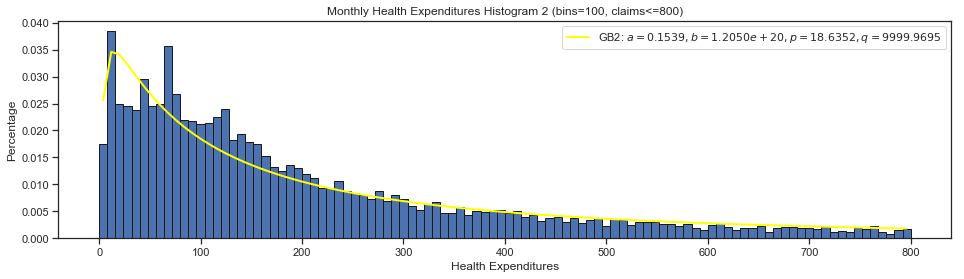

In [33]:
# plot the GB2 MLE histogram curve (not PDF) on the original second histogram
count, bins, ignored = plt.hist(health_df[0], bins=100, range=(min(health_df[0]),800), 
                                weights=[1/len(health_df[0])]*len(health_df[0]), edgecolor='k')
plt.plot([0.5*(bins[i]+bins[i+1]) for i in range(100)], 
         [GB2_cdf(a=GB2_result.x[0], b=GB2_result.x[1], p=GB2_result.x[2], q=GB2_result.x[3], up=gamma_bins[i], bottom=gamma_bins[i-1]) for i in range(1,101)], 
         linewidth=2, color='yellow', 
         label=r'GB2: $a={}, b={}, p={}, q={}$'.format(round(GB2_result.x[0],4),"1.2050e+20",round(GB2_result.x[2],4),round(GB2_result.x[3],4)))

plt.title('Monthly Health Expenditures Histogram 2 (bins=100, claims<=800)')
plt.xlabel('Health Expenditures')
plt.ylabel('Percentage')
plt.legend()
plt.show()

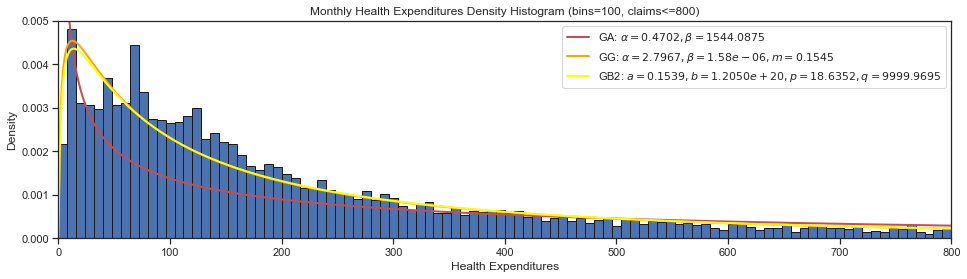

In [43]:
# plot the original density and the GA, GG, GB2 density
bin_edges = list(np.linspace(min(health_df[0]),800,101)) + [max(health_df[0])]
density_count, density_bins, density_ignored = plt.hist(health_df[0], bins=bin_edges, density=True, edgecolor='k')
plt.plot(range(0,801), sp.stats.gamma.pdf(range(0,801), GA_result.x[0],0,GA_result.x[2]),
         linewidth=2, color='r', label=r'GA: $\alpha={}, \beta={}$'.format(round(GA_result.x[0],4),round(GA_result.x[2],4)))
plt.plot(range(0,801), GG_pdf(range(0,801), a=GG_result.x[0], b=GG_result.x[1], m=GG_result.x[2]),
         linewidth=2, color='orange',
         label=r'GG: $\alpha={}, \beta={}, m={}$'.format(round(GG_result.x[0],4),round(GG_result.x[1],8),round(GG_result.x[2],4)))
plt.plot(range(0,801), GB2_pdf(range(0,801), a=GB2_result.x[0], b=GB2_result.x[1], p=GB2_result.x[2], q=GB2_result.x[3]),
         linewidth=2, color='yellow', 
         label=r'GB2: $a={}, b={}, p={}, q={}$'.format(round(GB2_result.x[0],4),"1.2050e+20",round(GB2_result.x[2],4),round(GB2_result.x[3],4)))


plt.title('Monthly Health Expenditures Density Histogram (bins=100, claims<=800)')
plt.xlabel('Health Expenditures')
plt.ylabel('Density')
plt.ylim([0,0.005])
plt.xlim([0,800])
plt.legend()
plt.show()

### 1. (e)

In [38]:
# (e)  Perform a likelihood ratio test for each of the estimated in parts (b) and (c), respectively, against the GB2 specification in part (d).

# GA VS GB2
LR_GA_GB2 = 2*((-1) * GA_result.fun -(-1) * GB2_result.fun)
pval_GA_GB2 = 1.0 - sp.stats.chi2.cdf(LR_GA_GB2, 4)
print("GA_GB2 likelihood ratio value: {}".format(LR_GA_GB2), "p-value: {}".format(pval_GA_GB2), sep="\n")

GA_GB2 likelihood ratio value: -5491.444435296318
p-value: 1.0


In [39]:
# GG VS GB2
LR_GG_GB2 = 2*((-1) * GG_result.fun -(-1) * GB2_result.fun)
pval_GG_GB2 = 1.0 - sp.stats.chi2.cdf(LR_GG_GB2, 4)
print("GG_GB2 likelihood ratio value: {}".format(LR_GG_GB2), "p-value: {}".format(pval_GG_GB2), sep="\n")

GG_GB2 likelihood ratio value: -7.698502215847839
p-value: 1.0


### 1. (f)

In [40]:
#  (f) Using the estimated GB2 distribution from part (d), how likely am I to have a monthly health care claim of more than $1,000? How does this 
#  amount change if I use the estimated GA distribution from part (b)?

# Using GB2 to calculate the probability
print(GB2_cdf(a=GB2_result.x[0], b=GB2_result.x[1], p=GB2_result.x[2], q=GB2_result.x[3], bottom=1000))

0.13180395062585995


In [42]:
# Using GA to calculate the probability
print(1-sp.stats.gamma.cdf(x=1000, a=GA_result.x[0], scale=GA_result.x[2]))

0.23838242991466996


## 2. MLE estimation of simple macroeconomic model

In [2]:
macro_df = pd.read_csv("MacroSeries.txt", header=None)
macro_df = macro_df.rename(columns={0:'ct',1:'kt',2:'wt',3:'rt'})
macro_df

,ct,kt,wt,rt
0,1.067109e+07,8.040697e+06,1.059438e+07,0.954120
1,1.169487e+07,7.595072e+06,1.161079e+07,1.107009
2,9.292394e+06,8.323735e+06,9.225588e+06,0.802596
3,7.913165e+06,6.613792e+06,7.856274e+06,0.860176
4,8.140994e+06,5.632136e+06,8.082466e+06,1.039183
5,8.274414e+06,5.794292e+06,8.214926e+06,1.026655
6,8.625916e+06,5.889252e+06,8.563901e+06,1.053011
7,9.012820e+06,6.139431e+06,8.948024e+06,1.055408
8,8.788320e+06,6.414808e+06,8.725138e+06,0.984940
9,9.720972e+06,6.255021e+06,9.651085e+06,1.117297


### 2. (a)

In [3]:
# (a) Use the data (wt, kt) and equations (3) and (5) to estimate the four parameters (α, ρ, µ, σ) by maximum likelihood. The maximum likelihood 
# estimate (α^, ρ^, µ^, σ^) maximizes the likelihood function of that normal distribution of zt’s. Report your estimates and the inverse hessian 
# variance-covariance matrix of your estimates.

# calculate zt with equation(3)
def zt3(alpha, df):
    wt = df['wt']
    kt = df['kt']
    return (np.log(wt)-np.log(1-alpha)-alpha*np.log(kt))

# calculate pdf for zt
def zt_logpdf(zt, z0, rho, mu, sigma):
    log_pdfs = []
    log_pdfs.append(sp.stats.norm.logpdf(zt[0],loc=z0*rho+(1-rho)*mu,scale=sigma))
    for i in range(1,len(zt)):
        log_pdfs.append(sp.stats.norm.logpdf(zt[i],loc=zt[i-1]*rho+(1-rho)*mu,scale=sigma))
    return log_pdfs

# calculate negative log likelihood for zt
def zt_nll(paras, func, data):
    alpha, rho, mu, sigma = paras
    zt = func(alpha, df=data)
    return sum(zt_logpdf(zt, mu, rho, mu, sigma))*(-1)

In [11]:
# using AR(1) regression to reduce the number of parameters to guess, only need to guess alpha
import statsmodels.tsa.ar_model as ar

def AR1(alpha, func, df):
    zt = func(alpha, df)
    AR = ar.AR(zt)
    AR1_result = AR.fit(maxlag=1,trend='c')
    return {'const':AR1_result.params[0],'coefficient':AR1_result.params[1],'variance':AR1_result.sigma2}

In [23]:
# make MLE guess based on different initial guesses
zt3_result = []
for i in [0.1,0.3,0.5,0.7,0.9]:
    AR1_result = AR1(i, zt3, macro_df)
    alpha = i
    rho = AR1_result['coefficient']
    mu = AR1_result['const']/(1-rho)
    sigma = AR1_result['variance']**(0.5)
    temp_result = sp.optimize.minimize(zt_nll, np.array((alpha,rho,mu,sigma)), args = (zt3, macro_df), method = 'L-BFGS-B',
                                       bounds=[(1e-10,1.0-(1e-10)),((1e-10)-1.0,1.0-(1e-10)),(1e-10,None),(1e-10,None)])
    zt3_result.append(temp_result)

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


In [13]:
print(*[(r.fun, r.success, r.x) for r in zt3_result],sep='\n')

(-96.70690806602481, True, array([0.45751114, 0.7204934 , 9.52279292, 0.09199623]))
(-96.2629888847389, True, array([ 0.3       ,  0.81010709, 11.76219994,  0.09286871]))
(-96.70690808181014, True, array([0.45753034, 0.72047929, 9.52252377, 0.09199617]))
(-96.65369315318897, True, array([0.69994666, 0.48229521, 6.2808113 , 0.09204507]))
(-96.65373749910208, True, array([0.7020553 , 0.47985036, 6.25453181, 0.09204609]))


In [15]:
# choose the best optimization result
print("estimation based on equation(3):")
print("alpha: {}".format(round(zt3_result[2].x[0],4)))
print("rho: {}".format(round(zt3_result[2].x[1],4)))
print("mu: {}".format(round(zt3_result[2].x[2],4)))
print("sigma: {}".format(round(zt3_result[2].x[3],4)))
print("inverse hessian variance-covariance matrix:\n", zt3_result[2].hess_inv.todense())

estimation based on equation(3):
alpha: 0.4575
rho: 0.7205
mu: 9.5225
sigma: 0.092
inverse hessian variance-covariance matrix:
 [[ 2.29897605e+00 -1.56772815e+00 -3.07298782e+01 -3.44888572e-01]
 [-1.56772815e+00  1.08840034e+00  2.10889275e+01  2.05034326e-01]
 [-3.07298782e+01  2.10889275e+01  4.12031233e+02  4.32446936e+00]
 [-3.44888572e-01  2.05034326e-01  4.32446936e+00  1.16027268e-01]]


### 2. (b)

In [16]:
# (b) Use the data (rt, kt) and equations (4) and (5) to estimate the four parameters (α, ρ, µ, σ) by maximum likelihood. The maximum likelihood 
# estimate (α^, ρ^, µ^, σ^) maximizes the likelihood function of that normal distribution of zt’s. Report your estimates and the inverse hessian 
# variance-covariance matrix of your estimates.

# calculate zt with equation(4)
def zt4(alpha, df):
    rt = df['rt']
    kt = df['kt']
    return (np.log(rt)-np.log(alpha)-(alpha-1)*np.log(kt))

In [17]:
# make MLE guess based on different initial guesses
zt4_result = []
for i in [0.1,0.3,0.5,0.7,0.9]:
    AR1_result = AR1(i, zt4, macro_df)
    alpha = i
    rho = AR1_result['coefficient']
    mu = AR1_result['const']/(1-rho)
    sigma = AR1_result['variance']**(0.5)
    temp_result = sp.optimize.minimize(zt_nll, np.array((alpha,rho,mu,sigma)), args = (zt4, macro_df), 
                                      method = 'L-BFGS-B', options={'maxiter': 1000}, 
                                      bounds=[(1e-10,1-(1e-10)),((1e-10)-1,1-(1e-10)),(1e-10,None),(1e-10,None)])
    zt4_result.append(temp_result)

In [18]:
print(*[(r.fun, r.success, r.x) for r in zt4_result],sep='\n')

(-96.70690803613851, True, array([0.45748694, 0.72051074, 9.37081993, 0.09199616]))
(-96.70690802703797, True, array([0.45748095, 0.72051348, 9.37092886, 0.0919963 ]))
(-96.69271356292914, True, array([0.49994439, 0.68774433, 8.61023557, 0.0920097 ]))
(-96.65369362697709, True, array([0.69995871, 0.48229507, 5.11078624, 0.09204505]))
(-96.65373704991461, True, array([0.70190807, 0.48001313, 5.07718905, 0.09204533]))


In [20]:
# choose the best optimization result
print("estimation based on equation(4):")
print("alpha: {}".format(round(zt4_result[0].x[0],4)))
print("rho: {}".format(round(zt4_result[0].x[1],4)))
print("mu: {}".format(round(zt4_result[0].x[2],4)))
print("sigma: {}".format(round(zt4_result[0].x[3],4)))
print("inverse hessian variance-covariance matrix:\n", zt4_result[0].hess_inv.todense())

estimation based on equation(4):
alpha: 0.4575
rho: 0.7205
mu: 9.3708
sigma: 0.092
inverse hessian variance-covariance matrix:
 [[ 1.00095187e+00 -1.49160672e-01 -1.84515574e+01  9.26683356e-02]
 [-1.49160672e-01  1.79905397e-01  2.74489962e+00  1.68885516e-02]
 [-1.84515574e+01  2.74489962e+00  3.40138268e+02 -1.70917735e+00]
 [ 9.26683356e-02  1.68885516e-02 -1.70917735e+00  1.47625666e-02]]


### 2. (c)

In [21]:
# (c) According to your estimates from part (a), if investment/savings in the current period is kt = 7, 500, 000 and the productivity shock in the
# previous period was zt−1 = 10, what is the probability that the interest rate this period will be greater than rt = 1.

r_min = 1
alpha = zt3_result[2].x[0]
kt = 7500000
# According to equation (4), zt = ln(rt)-ln(alpha)-(alpha-1)*ln(kt). If rt> rmin=1, zt>ln(rmin)-ln(alpha)-(alpha-1)*ln(kt)
zt_min = np.log(r_min)-np.log(alpha)-(alpha-1)*np.log(kt)
zt_min

9.369431189666173

In [22]:
# zt conforms to normal distribution

zt_pre = 10
rho = zt3_result[2].x[1]
mu = zt3_result[2].x[2]
sigma = zt3_result[2].x[3]
answer = 1 - sp.stats.norm.cdf(zt_min,loc=zt_pre*rho+(1-rho)*mu,scale=sigma)
answer

0.9999999673295362